In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:

# Load the dataset
url = "C:/Users/marve/Vidhyuth/Jupyter/CO2 Emissions.csv"
data = pd.read_csv(url)


In [27]:

# Exploratory Data Analysis (EDA)
# Display basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [28]:
x=[]
for i in data['Transmission'].unique():
    x.append(i[0])
print(x,"\n",data['Transmission'].unique())

['A', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'M', 'A', 'M', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'] 
 ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [29]:
data=data.replace(to_replace=data['Transmission'].unique(),value=x)
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,A,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,A,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,A,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,A,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,A,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,A,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,A,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,A,Z,11.2,8.3,9.9,29,232


In [30]:
data['Vehicle Class'].unique()
classes=['COMPACT','SUV','SEDAN','SEDAN','COMPACT','COMPACT','SUV','SUV','SUV','SUV','SUV','SEDAN','SUV','SEDAN','SUV','SEDAN']

In [31]:
data=data.replace(to_replace=data['Vehicle Class'].unique(),value=classes)

In [32]:
data['Vehicle Class'].unique()
data['Fuel Type'].unique()#['Z', 'D', 'X', 'E', 'N']:[Premium Gas(1),Diesel(2),Reg Gas(3), Ethanol(4), Natural Gas(5)]
data['Transmission'].unique()

array(['A', 'M'], dtype=object)

In [33]:
data=data.drop(['Make','Model'],axis=1)

In [41]:
data=data.replace(to_replace=['COMPACT','SEDAN','SUV'],value=[1,2,3])
data=data.replace(to_replace=data['Transmission'].unique(),value=[1,2])
data=data.replace(to_replace=data['Fuel Type'].unique(),value=[1,2,3,4,5])

In [42]:
data

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,1,2.0,4,1,1,9.9,6.7,8.5,33,196
1,1,2.4,4,2,1,11.2,7.7,9.6,29,221
2,1,1.5,4,1,1,6.0,5.8,5.9,48,136
3,3,3.5,6,1,1,12.7,9.1,11.1,25,255
4,3,3.5,6,1,1,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...
7380,3,2.0,4,1,1,10.7,7.7,9.4,30,219
7381,3,2.0,4,1,1,11.2,8.3,9.9,29,232
7382,3,2.0,4,1,1,11.7,8.6,10.3,27,240
7383,3,2.0,4,1,1,11.2,8.3,9.9,29,232


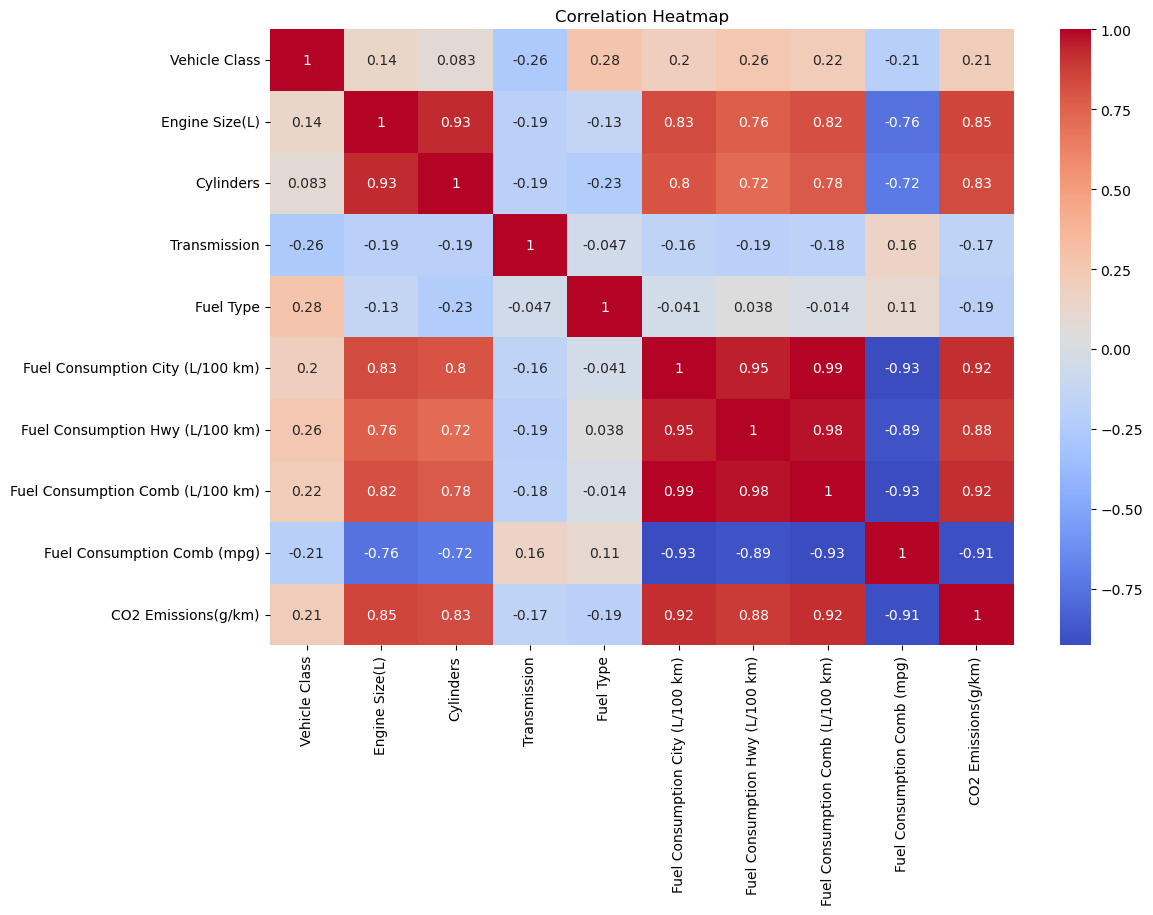

In [43]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


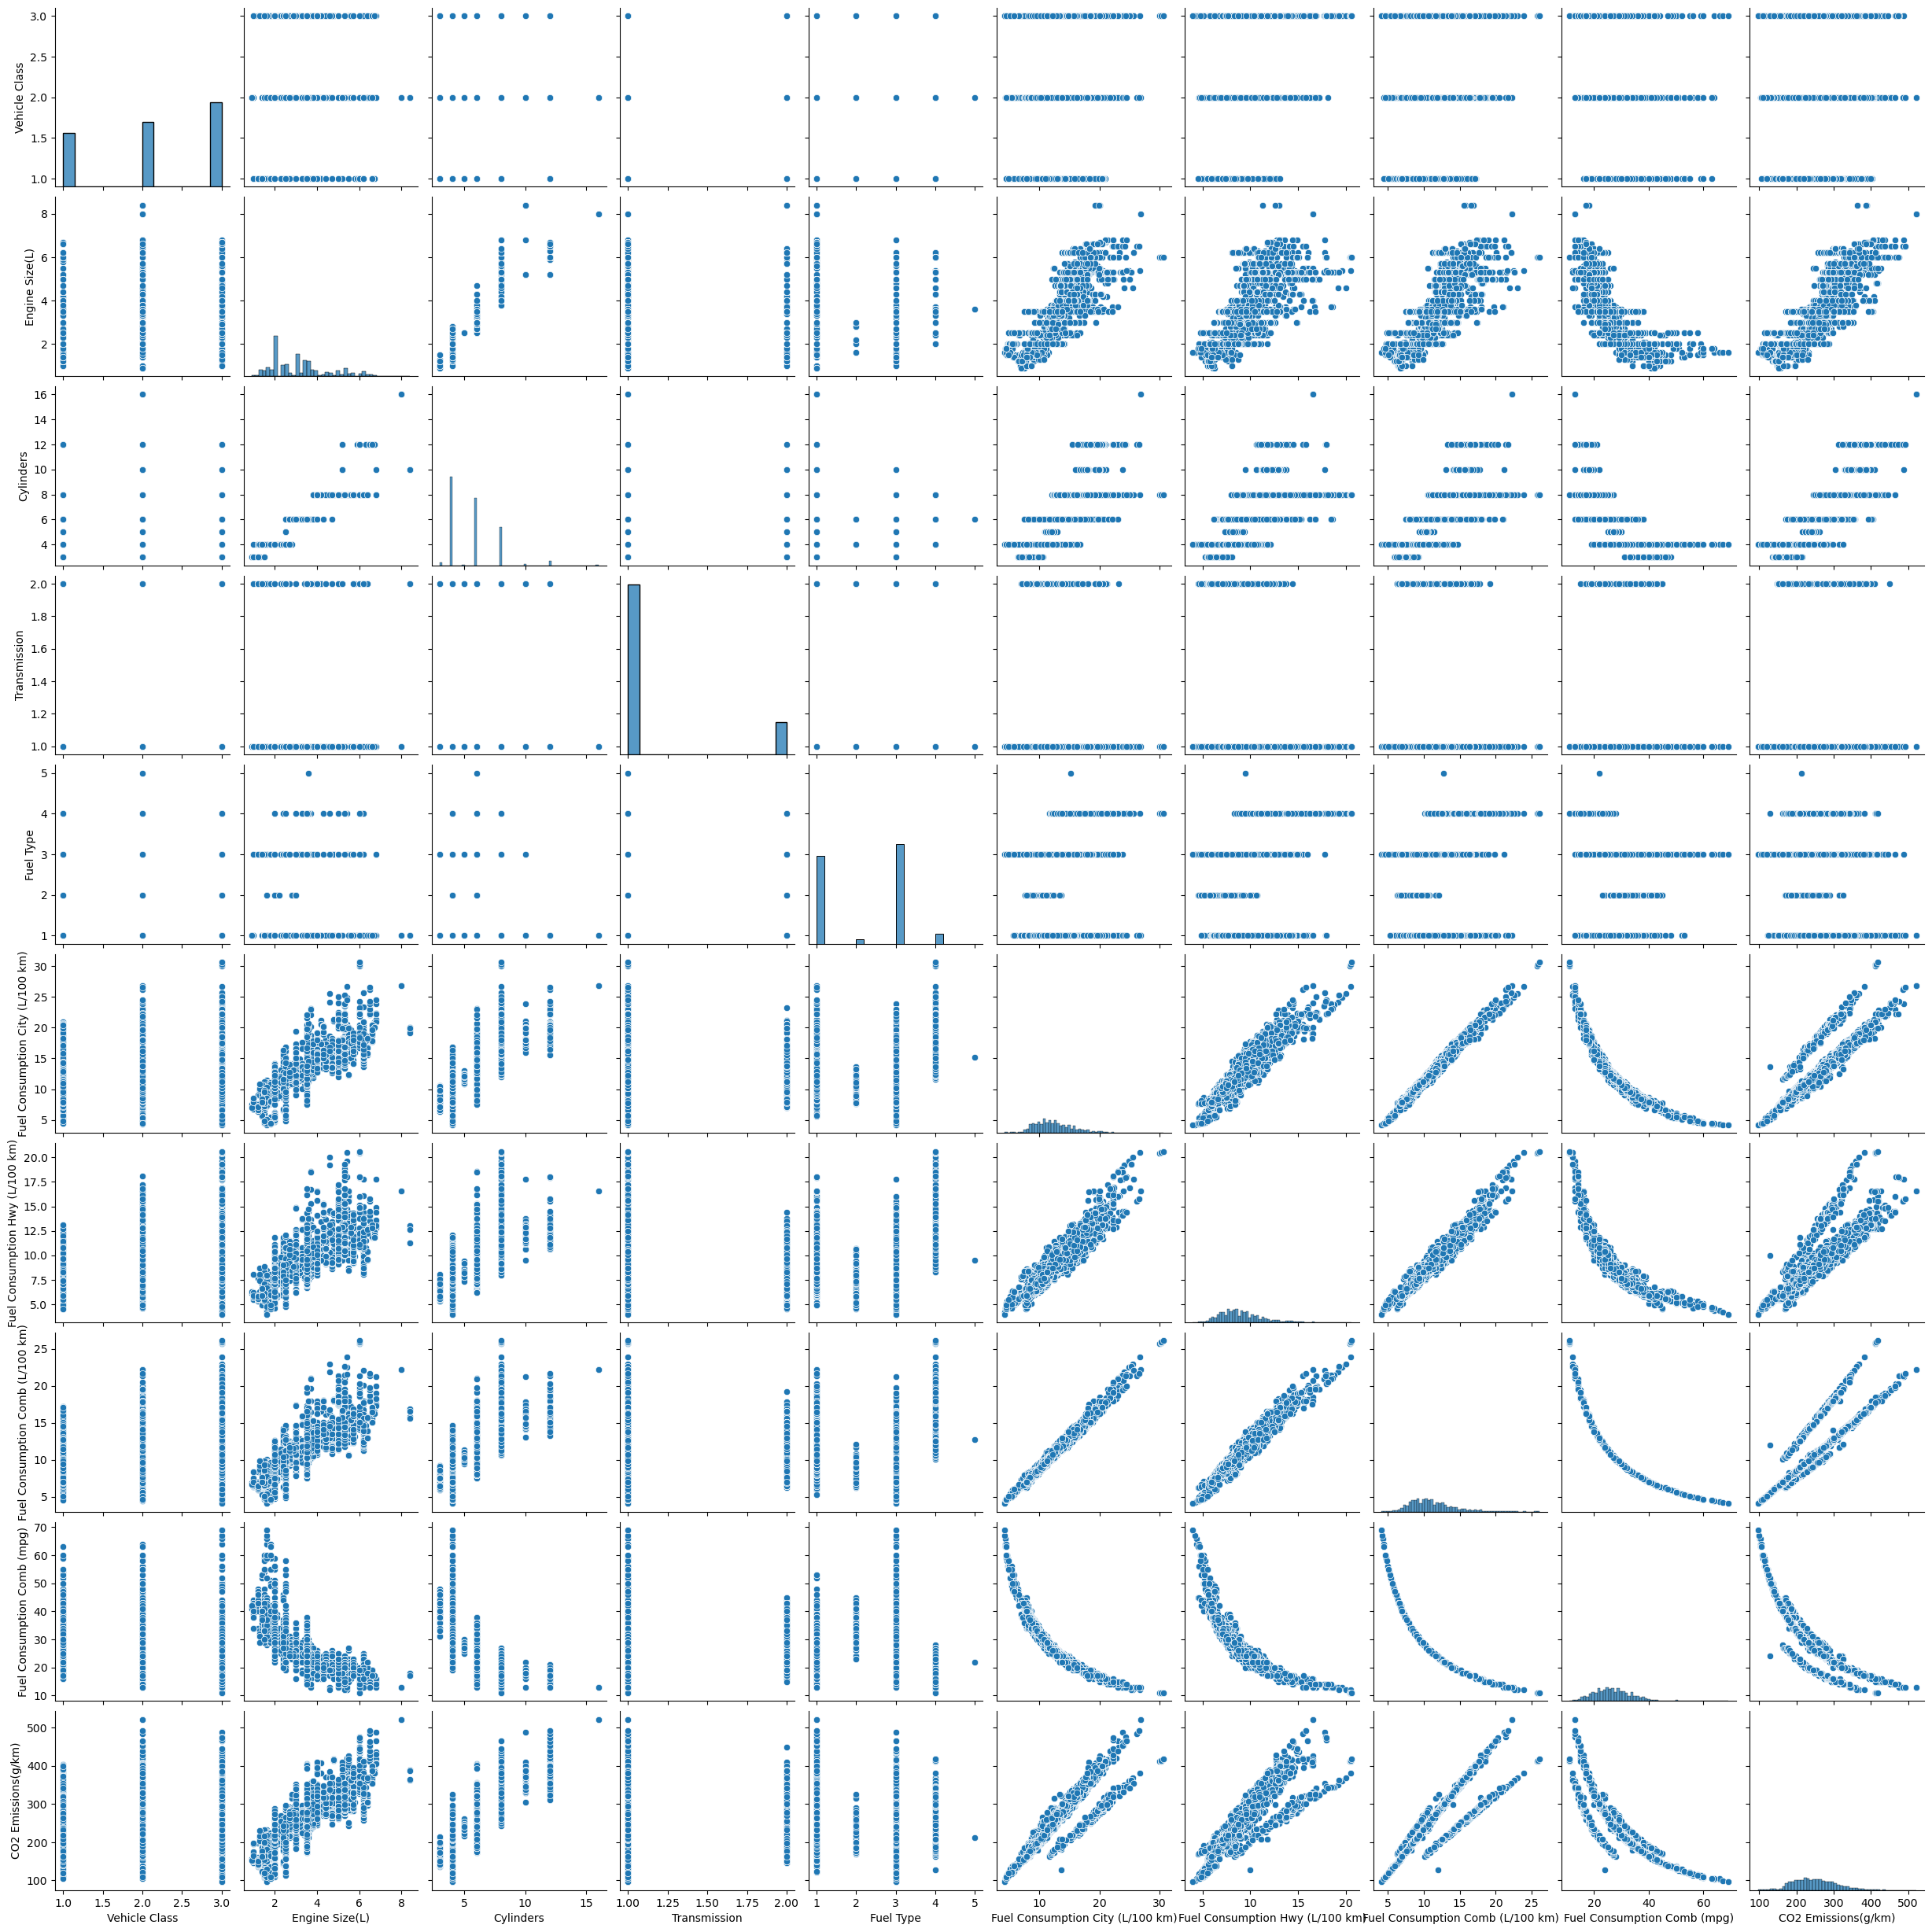

In [44]:

# Visualize data distribution and relationships
sns.pairplot(data)
plt.show()

In [45]:

# Data Preprocessing
X = data[['Vehicle Class','Fuel Type','Fuel Consumption City (L/100 km)']]
#.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Vehicle Class,Fuel Type,Fuel Consumption City (L/100 km)
0,1,1,9.9
1,1,1,11.2
2,1,1,6.0
3,3,1,12.7
4,3,1,12.1


In [46]:
from sklearn.metrics import r2_score
# Build and train the machine learning model (Linear Regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test,'\n\n',y_pred)
print("r2 Score",r2_score(y_test,y_pred))

7261    253
4489    344
1539    322
3532    297
6418    308
       ... 
7185    221
1740    260
4609    184
1844    235
5154    193
Name: CO2 Emissions(g/km), Length: 1477, dtype: int64 

 [264.41885571 326.94462882 314.41287984 ... 190.69512752 251.47625759
 211.56082135]
r2 Score 0.8734090279539191


In [47]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can use the model to predict emissions for new input parameters
new_data = pd.DataFrame({
    'Vehicle Class': [1],
    'Fuel Type':[1],
    'Fuel Consumption City (L/100 km)': [6.0]
})
predicted_emissions = model.predict(new_data)
print(f"Predicted Carbon Emissions: {predicted_emissions[0]} g/km")


Mean Squared Error: 435.42577788215283
Predicted Carbon Emissions: 157.6151451371864 g/km
